<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0514/07_%EC%98%A8%EB%9D%BC%EC%9D%B8%EC%87%BC%ED%95%91%ED%95%B4%EC%99%B8%ED%8C%90%EB%A7%A4_Pandas%EB%B0%8F%EC%8B%9C%EA%B0%81%ED%99%94(%EC%8B%A4%EC%8A%B5)_%ED%98%84%EC%B9%98%EC%9A%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!sudo apt-get install fonts-nanum*
!sudo fc-cache -fv
!rm -rf /home/ubuntu/.cache/matplotlib/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20180306-3).
fonts-nanum-coding is already the newest version (2.5-2).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

Text(0.5, 1.0, '한글')

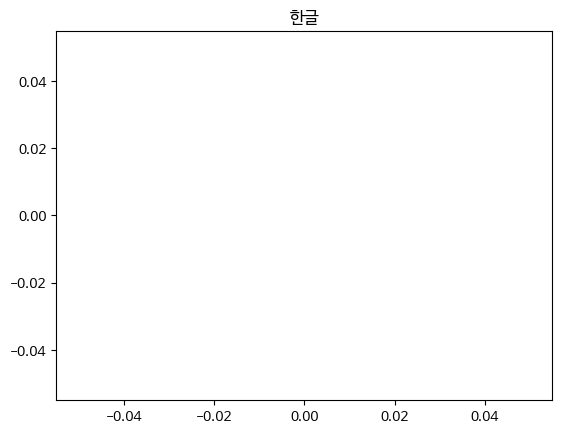

In [33]:
plt.plot()
plt.title('한글')

# 국가 대륙별 상품군별 온라인쇼핑 해외직접판매액 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [1]:
# 필요 라이브러리
import pandas as pd
import numpy as np

데이터 로드하기

In [173]:
!gdown --id 1PeyV_XaLrgFIvUW9XBuRqFapprmhG9tp

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1PeyV_XaLrgFIvUW9XBuRqFapprmhG9tp 



In [13]:
df = pd.read_csv('101_DT_1KE10081_20230514173209.csv', encoding = 'cp949')
print(df.shape)
df.head(5)

(969, 38)


,지역별,상품군별,판매유형별,항목,단위,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,...,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,Unnamed: 37
0,합계,합계,계,해외직접판매액[백만원],백만원,148272.0,153641.0,163999.0,213216.0,269101.0,...,1881628,1531212,1290332,1656729,1525174,1206923,1222986,1034913,926718,NaN
1,합계,합계,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,1655635,1297490,1051987,1410967,1247495,972384,974415,795824,681168,NaN
2,합계,합계,면세점 이외,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,225993,233722,238345,245762,277679,234539,248571,239089,245550,NaN
3,합계,컴퓨터 및 주변기기,계,해외직접판매액[백만원],백만원,4915.0,4052.0,3912.0,3529.0,2903.0,...,3827,4142,3814,7722,3589,4239,4450,3612,2707,NaN
4,합계,컴퓨터 및 주변기기,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,70,113,-,3497,-,-,-,-,-,NaN


## 분석 시각화를 위한 데이터프레임 변형 (Pandas Melt)
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [14]:
df = df.drop(['항목','단위','Unnamed: 37'],axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역별       969 non-null    object 
 1   상품군별      969 non-null    object 
 2   판매유형별     969 non-null    object 
 3   2014.1/4  150 non-null    float64
 4   2014.2/4  150 non-null    float64
 5   2014.3/4  150 non-null    float64
 6   2014.4/4  150 non-null    float64
 7   2015.1/4  150 non-null    float64
 8   2015.2/4  150 non-null    float64
 9   2015.3/4  150 non-null    float64
 10  2015.4/4  150 non-null    float64
 11  2016.1/4  150 non-null    float64
 12  2016.2/4  150 non-null    float64
 13  2016.3/4  150 non-null    float64
 14  2016.4/4  150 non-null    float64
 15  2017.1/4  969 non-null    object 
 16  2017.2/4  969 non-null    object 
 17  2017.3/4  969 non-null    object 
 18  2017.4/4  969 non-null    object 
 19  2018.1/4  969 non-null    object 
 20  2018.2/4  969 non-null    object

In [15]:
df=df.melt(id_vars=['지역별','상품군별','판매유형별'], var_name = '기간', value_name='판매금액(백만원)')
df = df.rename(columns = {'지역별' : '국가(대륙)별'})
df

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원)
0,합계,합계,계,2014.1/4,148272.0
1,합계,합계,면세점,2014.1/4,NaN
2,합계,합계,면세점 이외,2014.1/4,NaN
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN
...,...,...,...,...,...
31003,기타,생활·자동차용품,면세점,2021.4/4,-
31004,기타,생활·자동차용품,면세점 이외,2021.4/4,1081
31005,기타,기 타,계,2021.4/4,1076
31006,기타,기 타,면세점,2021.4/4,-


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008 entries, 0 to 31007
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   국가(대륙)별    31008 non-null  object
 1   상품군별       31008 non-null  object
 2   판매유형별      31008 non-null  object
 3   기간         31008 non-null  object
 4   판매금액(백만원)  21180 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


# 데이터 전처리

1) 기간에서 연도를 분리하기

In [19]:
df['연도'] = str(df['기간']).split('.')[0]
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도
0,합계,합계,계,2014.1/4,148272.0,0 2014
1,합계,합계,면세점,2014.1/4,NaN,0 2014
2,합계,합계,면세점 이외,2014.1/4,NaN,0 2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,0 2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,0 2014


In [20]:
df['연도'] = df['기간'].map(lambda x: int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도
0,합계,합계,계,2014.1/4,148272.0,2014
1,합계,합계,면세점,2014.1/4,NaN,2014
2,합계,합계,면세점 이외,2014.1/4,NaN,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014


2) 기간에서 분기를 분리하기

In [21]:
df['분기'] =  (str(df['기간']).split('/')[0]).split('.')[1]
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


3) 금액을 수치 데이터로 변경

In [22]:
df['판매금액(백만원)'] =df['판매금액(백만원)'].replace('-',pd.np.nan).astype(float)
df.head()

<ipython-input-22-dfbdb1a57864>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['판매금액(백만원)'] =df['판매금액(백만원)'].replace('-',pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008 entries, 0 to 31007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가(대륙)별    31008 non-null  object 
 1   상품군별       31008 non-null  object 
 2   판매유형별      31008 non-null  object 
 3   기간         31008 non-null  object 
 4   판매금액(백만원)  8448 non-null   float64
 5   연도         31008 non-null  int64  
 6   분기         31008 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

In [24]:
print(df.shape)

# 국가대륙별 합계, 상품군별 합계 제거 
df = df[(df['국가(대륙)별'] != '합계')&(df['상품군별'] != '합계')]


print(df.shape)

df.head()

(31008, 7)
(27648, 7)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
55,아시아,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
56,아시아,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
58,아시아,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1


# 연도별 판매액 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

In [25]:
df_total = df[df['판매유형별']=='계']
print(df_total.shape)

(9216, 7)


In [26]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
60,아시아,가전·전자,계,2014.1/4,NaN,2014,1
63,아시아,통신기기,계,2014.1/4,NaN,2014,1
66,아시아,소프트웨어,계,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
30993,기타,아동·유아용품,계,2021.4/4,750.0,2021,1
30996,기타,음·식료품,계,2021.4/4,41.0,2021,1
30999,기타,농축수산물,계,2021.4/4,NaN,2021,1
31002,기타,생활·자동차용품,계,2021.4/4,1081.0,2021,1


Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

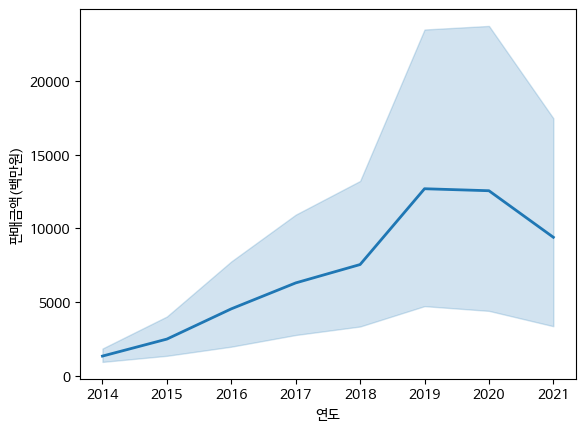

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = df_total, x= '연도', y= '판매금액(백만원)')

plt.show()

In [38]:
# 연도별, 판매액(백만원)의 평균을 구해보세요 

temp = df.groupby(df['연도'])[['판매금액(백만원)']].mean

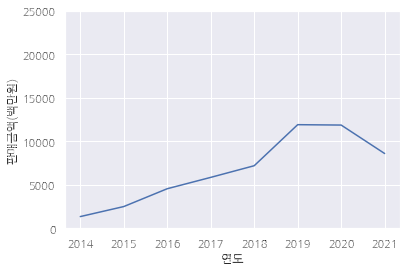

In [ ]:
#@title
g = sns.lineplot(data = df_total, x = '연도', y = '판매금액(백만원)', err_style=None)
g.set(ylim = (0, 25000))

plt.show()

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

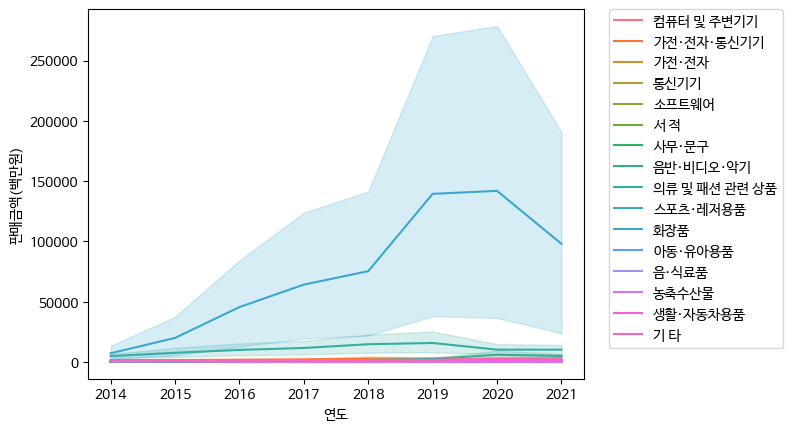

In [40]:
sns.lineplot(data=df_total, x='연도', y='판매금액(백만원)',hue ='상품군별')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) # 1.05 밖에 표시
plt.show()

Q4. 상품군별로 평균 판매금액을 내림차순으로 출력하세요. 

In [111]:
df_mean = df_total.groupby('상품군별').mean()
df_mean.sort_values(['판매금액(백만원)'],ascending=False)


<ipython-input-111-1c36fbdd2b84>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_total.groupby('상품군별').mean()


,판매금액(백만원),연도
상품군별,,
화장품,73914.694444,2017.5
의류 및 패션 관련 상품,10588.906250,2017.5
음반·비디오·악기,2246.263889,2017.5
가전·전자·통신기기,1917.079861,2017.5
기 타,1647.989583,2017.5
생활·자동차용품,1174.392361,2017.5
음·식료품,997.455882,2017.5
서 적,592.402778,2017.5
아동·유아용품,502.697917,2017.5


# 화장품의 온라인 쇼핑 직접 판매액

Q5. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

In [113]:
df_cosmetic = df_total[df_total['상품군별']=='화장품']
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
84,아시아,화장품,계,2014.1/4,NaN,2014,1
135,중국,화장품,계,2014.1/4,32235.0,2014,1
186,일본,화장품,계,2014.1/4,1034.0,2014,1
237,아세안,화장품,계,2014.1/4,398.0,2014,1
288,중동,화장품,계,2014.1/4,418.0,2014,1
...,...,...,...,...,...,...,...
30786,기타 유럽,화장품,계,2021.4/4,NaN,2021,1
30837,대양주,화장품,계,2021.4/4,239.0,2021,1
30888,중남미,화장품,계,2021.4/4,77.0,2021,1
30939,아프리카,화장품,계,2021.4/4,NaN,2021,1


Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

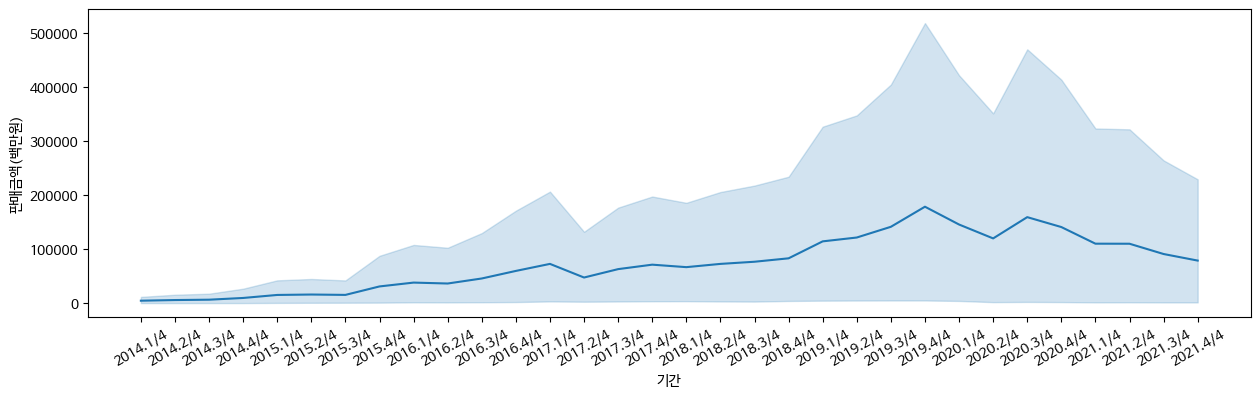

In [114]:
plt.figure(figsize = (15,4))

sns.lineplot(data = df_cosmetic, x= '기간', y= '판매금액(백만원)')
plt.xticks(rotation = 30)
plt.show()

Q7. 국가 대륙별로 다른 색상으로 표현해보기.

2015년의 국가별 화장품 매출

- 막대그래프로 시각화해보세요

<BarContainer object of 576 artists>

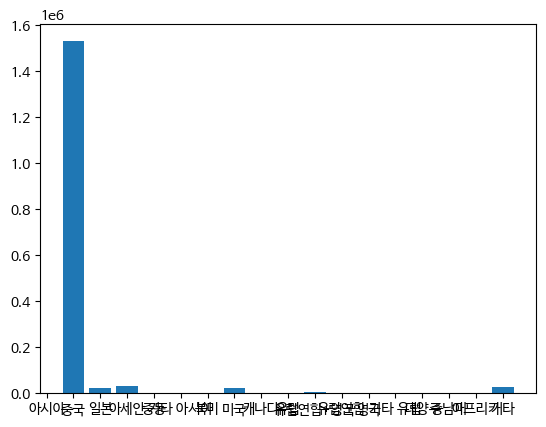

In [121]:
plt.bar(df_cosmetic['국가(대륙)별'],df_cosmetic['판매금액(백만원)'], width = 0.5, edgecolor = 'black')
#plt.bar(x축, y축,width = 폭, edgecolor = 막대테두리색)

- 상자그림으로 시각화해보세요

<Axes: xlabel='국가(대륙)별', ylabel='판매금액(백만원)'>

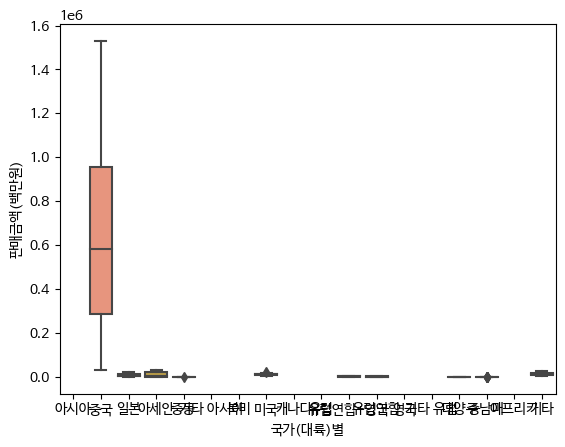

In [71]:
sns.boxplot(data = df_cosmetic, x= '국가(대륙)별', y= '판매금액(백만원)')

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

<Axes: xlabel='국가(대륙)별', ylabel='판매금액(백만원)'>

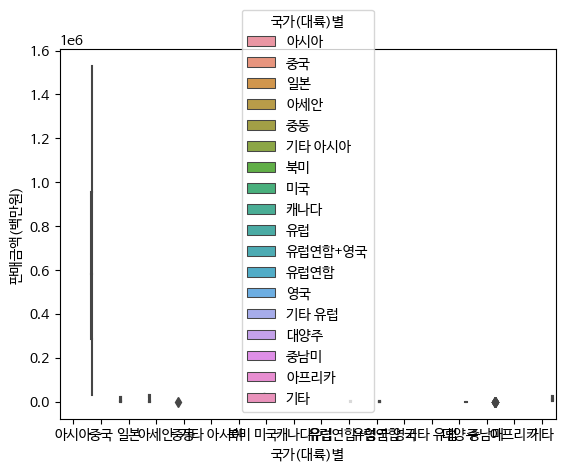

In [72]:
sns.boxplot(data = df_cosmetic, x= '국가(대륙)별', y= '판매금액(백만원)',hue ='국가(대륙)별')



Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

In [86]:
df_sub = df[(df['판매유형별'] != '계') & (df['상품군별'] == '화장품')]
df_sub.to_csv('x.csv')

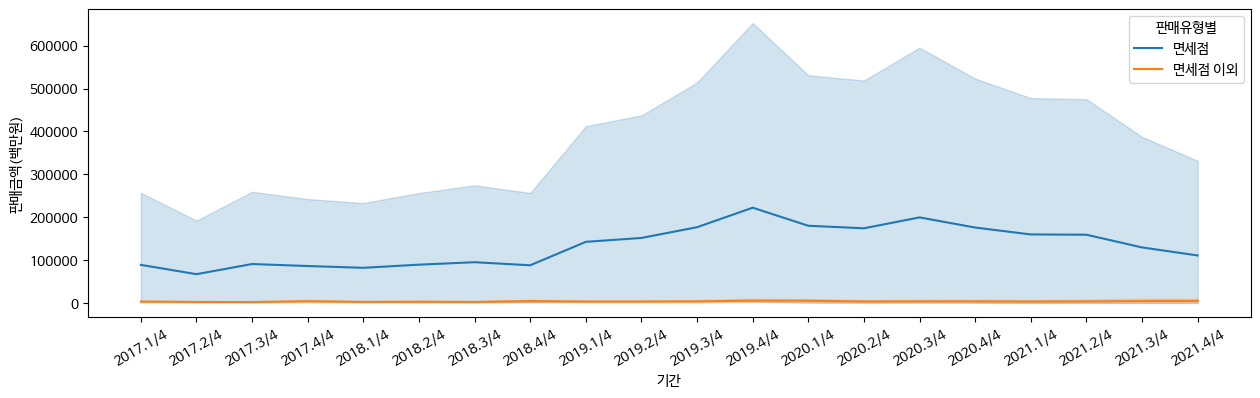

In [76]:
plt.figure(figsize = (15,4))

sns.lineplot(data=df_sub, x='기간', y='판매금액(백만원)', hue = '판매유형별')


plt.xticks(rotation = 30)
plt.show()

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

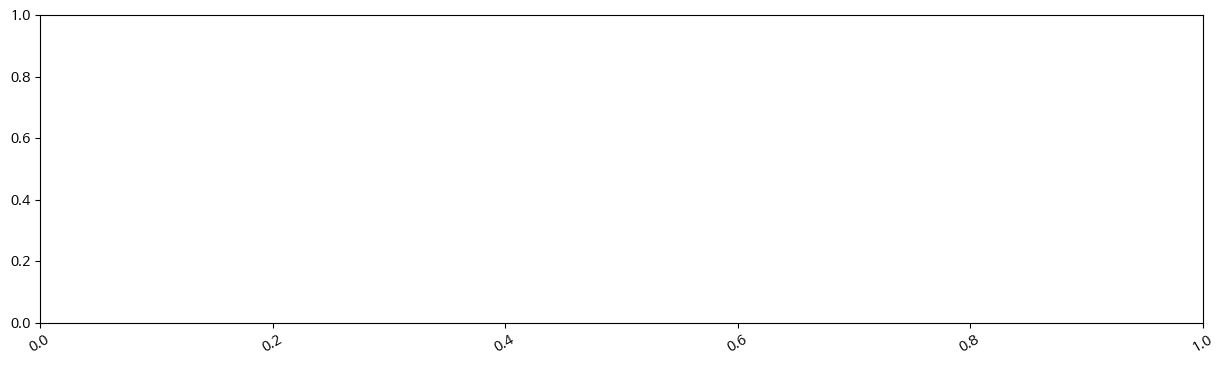

In [89]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)

sns.lineplot(data=df[df['판매유형별']=='면세점이외'], x='기간', y='판매금액(백만원)')

plt.show()

Q12. 국가별 기간에 따른 금액 데이터 시각화

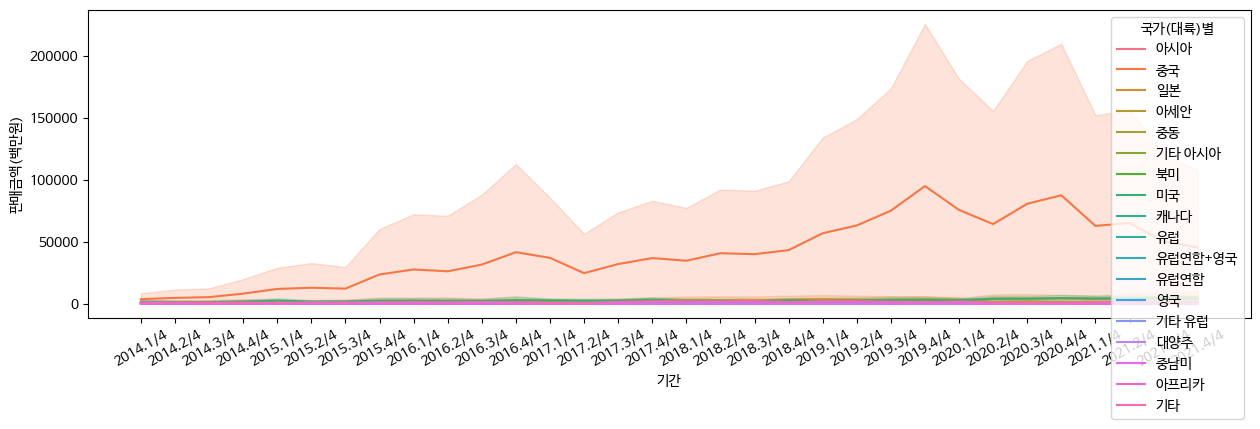

In [91]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)

sns.lineplot(data = df, x= '기간', y= '판매금액(백만원)',hue ='국가(대륙)별')
plt.show()

Q13. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

In [92]:
result = pd.pivot_table(df, index = '국가(대륙)별', columns = '연도', values = '판매금액(백만원)', aggfunc = 'sum') 
#  pd.pivot_table(불러올 데이터, index = : 불러올 행 데이터, columns = : 불러올 열 데이터, values = :안에 채우는 데이터, aggfuns = : 사용할 함수)
result

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,66900.0,68252.0,83603.0,184294.0,259932.0,241010.0,168384.0,154294.0
기타 아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타 유럽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
대양주,18326.0,14641.0,19181.0,39234.0,35126.0,26544.0,32542.0,33694.0
미국,96363.0,132638.0,154721.0,367174.0,338990.0,391048.0,513138.0,559184.0
북미,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
아세안,45311.0,58358.0,75496.0,295534.0,331946.0,403256.0,282236.0,205828.0
아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
아프리카,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Q14. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

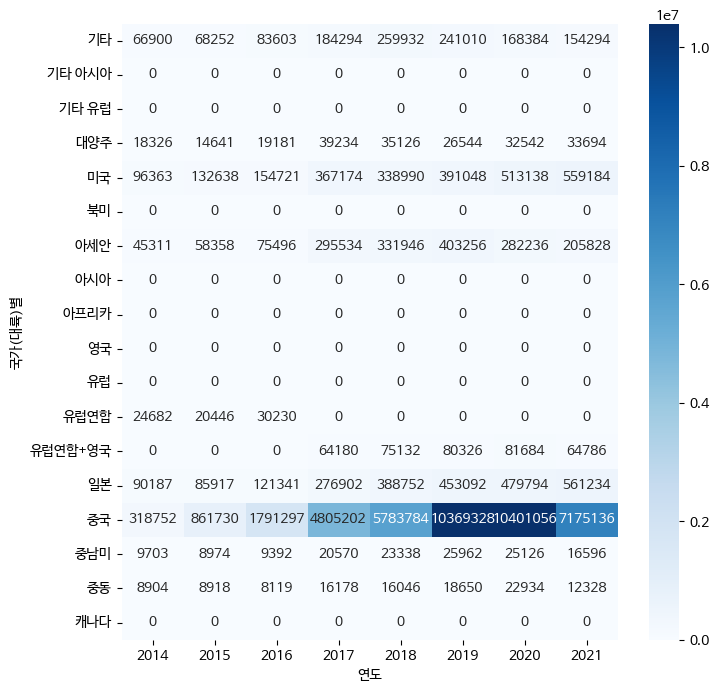

In [96]:
plt.figure(figsize = (8,8))

sns.heatmap(result, cmap ='Blues', annot=True, fmt='.0f')
plt.show()
# 히트맵 :
# sns.heatmap(data = '필요한 데이터 입력', annot = True  : 각 cell의 데이터 표기 유무, fmt = '.0%' : values(데이터의 값)값의 소수점 표기, vmin = 0 : 최소값 설정)